In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)

In [ ]:
X = tf.constant([-5, -3, 0, 4, 7, 9, 11])
y = tf.constant([5, 7, 10, 14, 17, 19, 21])

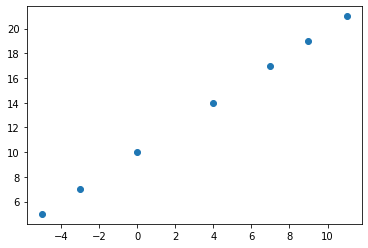

In [ ]:
plt.scatter(X, y)

In [ ]:
#Checking the shape of the input i.e., an input is just a feature in our case
X[0].shape

TensorShape([])

In [ ]:
#building the model for regression
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units=1)
])

#compiling the model
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.MAE, 
              metrics=tf.keras.metrics.MAE)

#fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 11.4127 - mean_absolute_error: 11.4127
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2947 - mean_absolute_error: 11.2947
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1767 - mean_absolute_error: 11.1767
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0588 - mean_absolute_error: 11.0588
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9408 - mean_absolute_error: 10.9408
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8229 - mean_absolute_error: 10.8229
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7049 - mean_absolute_error: 10.7049
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5869 - mean_absolute_error: 10.5869
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4690 - mean_absolute_error: 10.4690
Epoch 10/1

In [ ]:
#now evaluate the trained model
model.evaluate(tf.constant([25]), tf.constant([35]))

1/1 [==============================] - 0s 141ms/step - loss: 15.0801 - mean_absolute_error: 15.0801


[15.080135345458984, 15.080135345458984]

In [ ]:
#now test the model
y_pred = model.predict(tf.constant([25]))
y_pred

array([[50.080135]], dtype=float32)

Now lets make the model better

In [ ]:
# create the model
model2 = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(100, activation='relu'),
                                     tf.keras.layers.Dense(50, activation='relu'),
                                     tf.keras.layers.Dense(1)
])

#compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss = tf.keras.losses.mae,
               metrics = tf.keras.metrics.mae
               )

#now fit the model
model2.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 510ms/step - loss: 12.7643 - mean_absolute_error: 12.7643
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3754 - mean_absolute_error: 11.3754
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0516 - mean_absolute_error: 10.0516
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4865 - mean_absolute_error: 8.4865
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 6.6308 - mean_absolute_error: 6.6308
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 4.6322 - mean_absolute_error: 4.6322
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 3.3220 - mean_absolute_error: 3.3220
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 4.2365 - mean_absolute_error: 4.2365
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 4.8625 - mean_absolute_error: 4.8625
Epoch 10/100
1/1

In [ ]:
#Evaluate the model
model2.evaluate(tf.constant([27]),tf.constant([37]))

1/1 [==============================] - 0s 123ms/step - loss: 0.1621 - mean_absolute_error: 0.1621


[0.16211700439453125, 0.16211700439453125]

In [ ]:
#test the model
y_pred = model2.predict(tf.constant([17]))
y_pred

array([[26.310211]], dtype=float32)

Linear regression on a larger dataset

In [ ]:
#Make a larger dataset using range function
X = tf.range(start=-100, limit=100, delta= 4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

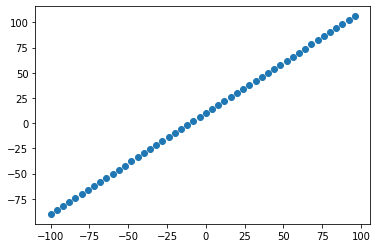

In [ ]:
plt.scatter(X, y)

In [ ]:
#Now divide data into three sets, training, validation and testing sets
#Training 70-80% , Validation 10-15%, Tetsing 10-15%
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

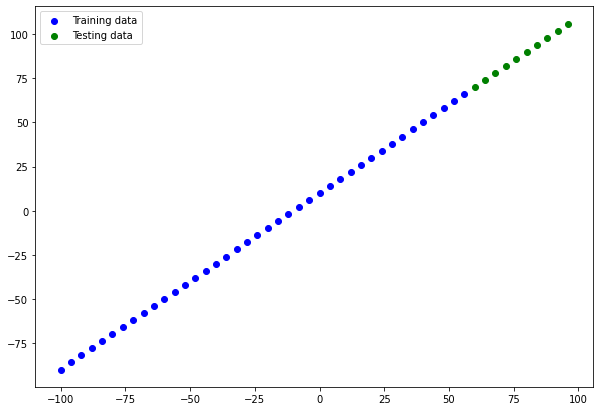

In [ ]:
#Now plot training and testing samples
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label = "Training data")
plt.scatter(X_test, y_test, c="g", label = "Testing data")
plt.legend()

In [ ]:
#create a model
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units = 10, input_shape = [1], name="input_layer"),
                                    tf.keras.layers.Dense(units=1, name="output_layer")
], name="Linear_Regression_model")

#Compile 
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = tf.keras.metrics.mae)

#Fit the model
#verbose=0 makes the fit function not print the taining steps every epoch
model.fit(x=X_train, y=y_train, epochs=100, verbose=0)

In [ ]:
#Visualise the model
model.summary()

Model: "Linear_Regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


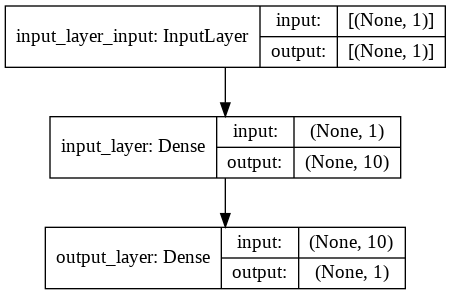

In [ ]:
#plot model
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

In [ ]:
#visualising the models predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55221 ],
       [ 75.13992 ],
       [ 79.72765 ],
       [ 84.31538 ],
       [ 88.9031  ],
       [ 93.49082 ],
       [ 98.07855 ],
       [102.666275],
       [107.254005],
       [111.84173 ]], dtype=float32)

In [ ]:
#Lets create a plotting functions
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_lables = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label = "Training_data")
  plt.scatter(test_data, test_lables, c="g", label = "Testing_data")
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
  plt.legend()

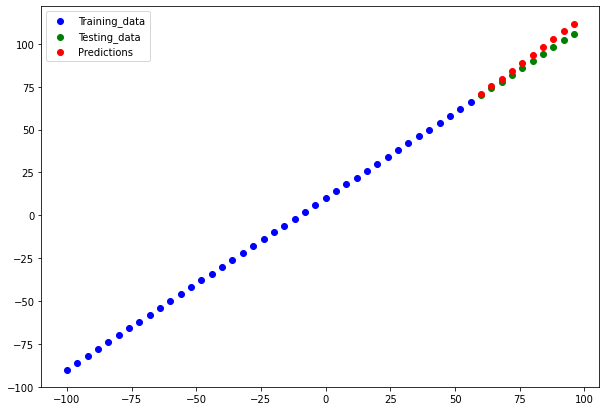

In [ ]:
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_lables=y_test,
                 predictions=y_pred)

In [ ]:
#Make some functions for mae and mse to use going forward
def mae(y_true, y_pred):
  return tf.keras.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [ ]:
mae_error = mae(y_true=y_test, y_pred=y_pred)
mse_error = mse(y_true=y_test, y_pred=y_pred)
mae_error, mse_error

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.0703>)

Now create a pandas dataframe to visualise results of multiple models at once

In [ ]:
import pandas as pd

model_results = [["model_1", mae_error.numpy(), mse_error.numpy()],
                 ["model_1", mae_error.numpy(), mse_error.numpy()]]

all_results = pd.DataFrame(data=model_results, columns=["model_name", "mae", "mse"])
all_results

,model_name,mae,mse
0,model_1,3.196964,13.0703
1,model_1,3.196964,13.0703


Let's save the trained model to use it later

**There are two ways we can seave the model**
1] The SavedModel format
2] The HDF5 format

In [ ]:
model.save("best_LR_model_firstway")

INFO:tensorflow:Assets written to: best_LR_model_firstway/assets


In [ ]:
#HDF5 is used to save bigger and complex model as it has the capability to hold large amounts of data and also because HDF5 format is more universal
model.save("best_LR_model_secondway.h5")

Now lets reload the saved model and use it again

In [ ]:
#Loading the saved model
new_model = tf.keras.models.load_model("/content/best_LR_model_secondway.h5")

new_model.summary()

Model: "Linear_Regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.evaluate(x=X_test, y=y_test)

1/1 [==============================] - 0s 122ms/step - loss: 3.1970 - mean_absolute_error: 3.1970


[3.1969642639160156, 3.1969642639160156]

In [ ]:
y_pred = new_model.predict(x=X_test)

In [ ]:
mae(y_true=y_test, y_pred=y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>

How to download a model or any other file from google colab

In [ ]:
from google.colab import files
#files.download("/content/best_LR_model_secondway.h5")

 **Now its time to work on a larger problem**

In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#one hot encode categorical columns
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create X and y values
y = insurance_one_hot['charges']
X = insurance_one_hot.drop(columns='charges')
X.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [ ]:
#create train test split for the X and y data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Now lets build a model
insurance_model = tf.keras.models.Sequential([
                                              tf.keras.layers.Dense(units=10),
                                              tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=tf.keras.metrics.mae)

insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
#Now check how the model actually works
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8443.0430 - mean_absolute_error: 8443.0430


[8443.04296875, 8443.04296875]

In [ ]:
#Now lets make the model better
tf.random.set_seed(42)

insurance_model2 = tf.keras.models.Sequential([
                                               tf.keras.layers.Dense(units=100),
                                               tf.keras.layers.Dense(units=10),
                                               tf.keras.layers.Dense(units=1)
])
insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=tf.keras.metrics.mae)

history = insurance_model2.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
#Evaluate the larger model now
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3494.5325 - mean_absolute_error: 3494.5325


[3494.532470703125, 3494.532470703125]

Text(0, 0.5, 'loss')

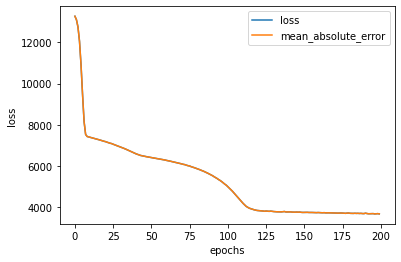

In [ ]:
#Now plot the history
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

Preprocessing data (Normalisation and Standardization)

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


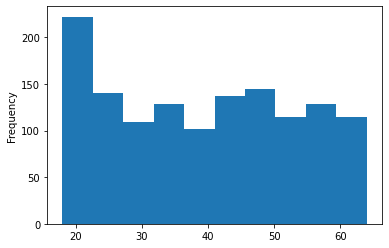

In [ ]:
X["age"].plot(kind = 'hist')

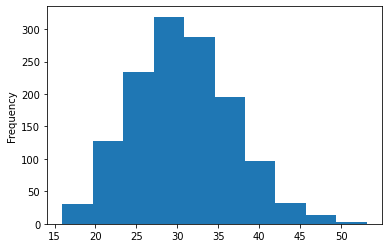

In [ ]:
X['bmi'].plot(kind = 'hist')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import  train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown='ignore'), ["sex", "smoker", "region"])
)

#Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Now transform training data and testing data to normalize
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#What does the data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#Now lets build a neural network model and see how it goes
tf.random.set_seed(42)

insurance_model3 = tf.keras.models.Sequential([
                                               tf.keras.layers.Dense(units=100),
                                               tf.keras.layers.Dense(units=10),
                                               tf.keras.layers.Dense(units=1)
])
insurance_model3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=tf.keras.metrics.mae)

history = insurance_model3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
#Evaluate the larger model now with normalised data
insurance_model3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5779 - mean_absolute_error: 3171.5779


[3171.577880859375, 3171.577880859375]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
